#Carga de datos y librerias


In [1]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

#Biblioteca de Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dropout, LSTM, Dense, Activation,Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time


In [2]:
pip install scikit-posthocs --quiet

In [3]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [4]:
cd /content/gdrive/MyDrive/Tesis/Datos

/content/gdrive/MyDrive/Tesis/Datos


#Analsisis de Error de cada modelo

In [6]:
result_mlp=pd.read_csv('results_MLP_Wallmart.csv',index_col=0)
result_gru=pd.read_csv('results_GRU_Wallmart.csv',index_col=0)
result_lstm=pd.read_csv('results_LSTM_Wallmart.csv',index_col=0)
result_cnn=pd.read_csv('results_CNN_Wallmart.csv',index_col=0)
result_transformer=pd.read_csv('results_Transformer_Wallmart3.csv',index_col=0)
result_svr=pd.read_csv('results_SVR_Wallmart.csv',index_col=0)
result_elm=pd.read_csv('results_ELM_Wallmart.csv',index_col=0)

In [ ]:
print(result_mlp.shape)
print(result_gru.shape)
print(result_lstm.shape)
print(result_cnn.shape)
print(result_transformer.shape)
print(result_svr.shape)
print(result_elm.shape)

##ELM

In [8]:
result_elm = result_elm.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_elm.head(5)


Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
109,ELM_sigm_64.0,22,5,0.004913,0.732334,3.018353,0.855765,0.623767
128,ELM_sigm_32.0,26,4,0.002617,0.805939,1.691119,0.897741,0.643337
84,ELM_sigm_64.0,17,5,0.002130,0.871642,2.527777,0.933618,0.680026
9,ELM_sigm_64.0,2,5,0.007477,0.885907,3.718460,0.941227,0.708913
129,ELM_sigm_32.0,26,5,0.002536,0.890979,2.053669,0.943917,0.694563


In [10]:
print(result_elm["time"].mean())
print(result_elm["MSE"].mean())

0.03686398792266841
21086982710193.734


##SVR

In [ ]:
result_svr = result_svr.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_svr.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
index,,,,,,,,
101,SVR_Wallmart_21_2_linear_0.1_0.2_scale,21,2,0.089041,0.411165,8.750326,0.641222,0.477221
196,SVR_Wallmart_40_2_linear_0.1_0.2_scale,40,2,0.090399,0.411165,8.750326,0.641222,0.477221
156,SVR_Wallmart_32_2_linear_0.1_0.2_scale,32,2,0.096840,0.411165,8.750326,0.641222,0.477221
139,SVR_Wallmart_28_5_linear_0.1_0.1_scale,28,5,0.549153,0.412342,9.551642,0.642138,0.478596
109,SVR_Wallmart_22_5_linear_0.1_0.1_scale,22,5,0.543340,0.412342,9.551642,0.642138,0.478596


In [ ]:
result_svr["time"].mean()

138.8434388179779

##MLP

In [ ]:
result_mlp = result_mlp.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_mlp.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
63,MLP_Wallmart_13_4_800_20.0_2.0_416.0_0.52_adam...,13,4,22.453038,0.452941,0.673009,0.497926,176.674988
23,MLP_Wallmart_5_4_800_70.0_1.0_224.0_0.49_adam_...,5,4,9.778895,0.454599,0.674240,0.500750,171.819305
24,MLP_Wallmart_5_5_800_70.0_1.0_224.0_0.49_adam_...,5,5,4.642483,0.460354,0.678494,0.505545,170.328751
248,MLP_Wallmart_50_4_800_20.0_1.0_224.0_0.46_adam...,50,4,13.896975,0.468057,0.684147,0.506974,168.532791
62,MLP_Wallmart_13_3_800_20.0_2.0_416.0_0.52_adam...,13,3,7.579901,0.468259,0.684294,0.510273,146.675659


In [ ]:
result_mlp["MSE"].mean()

0.6449756668806076

##GRU

In [ ]:
result_gru = result_gru.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_gru.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
72,GRU_Wallmart_15_3_800_20.0_3.0_660.0_0.46_adam...,15,3,55.877682,0.449797,0.670669,0.484561,214.838333
57,GRU_Wallmart_12_3_800_50.0_1.0_240.0_0.68_adam...,12,3,51.905466,0.453476,0.673406,0.496651,208.590561
237,GRU_Wallmart_48_3_800_20.0_3.0_280.0_0.49_adam...,48,3,120.234842,0.454149,0.673906,0.496059,211.382980
42,GRU_Wallmart_9_3_800_40.0_3.0_680.0_0.68_adam_...,9,3,48.516264,0.456342,0.675531,0.495815,203.691544
97,GRU_Wallmart_20_3_800_50.0_2.0_760.0_0.58_adam...,20,3,22.625808,0.457379,0.676298,0.495662,192.737686


In [ ]:
result_gru["MSE"].mean()

0.5689583206176758

##LSTM

In [ ]:
result_lstm = result_lstm.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_lstm.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
index,,,,,,,,
52,LSTM_Wallmart_11_3_800_10.0_3.0_480.0_0.65_ada...,11,3,437.059806,0.480841,0.693427,0.445948,212.514267
157,LSTM_Wallmart_32_3_800_60.0_3.0_288.0_0.4_adam...,32,3,98.112931,0.481055,0.693581,0.458711,204.585785
82,LSTM_Wallmart_17_3_800_30.0_3.0_544.0_0.66_ada...,17,3,256.994795,0.481919,0.694204,0.444976,205.080780
37,LSTM_Wallmart_8_3_800_20.0_2.0_384.0_0.57_adam...,8,3,276.205855,0.493671,0.702617,0.459211,222.594284
182,LSTM_Wallmart_37_3_800_30.0_3.0_352.0_0.62_ada...,37,3,240.347845,0.497273,0.705176,0.451805,204.414932


In [ ]:
result_lstm["MSE"].mean()

0.8202914172410964

##CNN

In [ ]:
result_cnn= result_cnn.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_cnn.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
94,CNN_Wallmart_19_5_800_100.0_2.0_100.0_0.51_ada...,19,5,23.888380,0.412506,0.642267,0.460968,216.787018
213,CNN_Wallmart_43_4_800_10.0_2.0_200.0_0.46_adam...,43,4,108.787956,0.412562,0.642310,0.474048,237.853683
193,CNN_Wallmart_39_4_800_40.0_2.0_400.0_0.43_adam...,39,4,25.038480,0.425129,0.652019,0.475345,203.360809
68,CNN_Wallmart_14_4_800_70.0_2.0_700.0_0.66_adam...,14,4,27.102685,0.429269,0.655186,0.477540,241.695984
212,CNN_Wallmart_43_3_800_10.0_2.0_200.0_0.46_adam...,43,3,108.869204,0.429327,0.655230,0.470942,190.905502


In [ ]:
result_cnn["MSE"].mean()

0.5509986714124679

##Transformer

In [ ]:
result_transformer= result_transformer.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_transformer.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
index,,,,,,,,
233,Transformer_Wallmart_47_4_800_60.0_128.0_4.0_0...,47,4,128.786824,0.393783,0.627521,0.466447,194.860733
183,Transformer_Wallmart_37_4_800_10.0_128.0_7.0_0...,37,4,575.220837,0.406897,0.637885,0.490450,217.820114
184,Transformer_Wallmart_37_5_800_10.0_128.0_7.0_0...,37,5,618.480297,0.408189,0.638897,0.497132,228.385986
199,Transformer_Wallmart_40_5_800_10.0_64.0_8.0_0....,40,5,639.472851,0.411071,0.641148,0.503603,195.542511
129,Transformer_Wallmart_26_5_800_10.0_128.0_7.0_0...,26,5,701.878154,0.414218,0.643597,0.519830,219.940002


In [ ]:
result_transformer["MSE"].mean()

43.33879332864284

#Se verifica normalidad de los errores de test

In [ ]:
from scipy.stats import shapiro
import numpy as np
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi
import scikit_posthocs as sp

In [ ]:
def test_shapiro(data):
  stat, p = shapiro(data)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Probably Gaussian')
    print("")
  else:
    print('Probably not Gaussian')
    print("")

In [ ]:
print("Test de shapiro a Resutl MLP")
test_shapiro(result_mlp["MSE"])

print("Test de shapiro a Resutl ELM")
test_shapiro(result_elm["MSE"])

print("Test de shapiro a Resutl SVR")
test_shapiro(result_svr["MSE"])

print("Test de shapiro a Resutl GRU")
test_shapiro(result_gru["MSE"])

print("Test de shapiro a Resutl LSTM")
test_shapiro(result_lstm["MSE"])

print("Test de shapiro a Resutl CNN")
test_shapiro(result_cnn["MSE"])

print("Test de shapiro a Resutl transformer")
test_shapiro(result_transformer["MSE"])

Test de shapiro a Resutl MLP
stat=0.962, p=0.000
Probably not Gaussian

Test de shapiro a Resutl ELM
stat=0.316, p=0.000
Probably not Gaussian

Test de shapiro a Resutl SVR
stat=0.076, p=0.000
Probably not Gaussian

Test de shapiro a Resutl GRU
stat=0.880, p=0.000
Probably not Gaussian

Test de shapiro a Resutl LSTM
stat=0.905, p=0.000
Probably not Gaussian

Test de shapiro a Resutl CNN
stat=0.885, p=0.000
Probably not Gaussian

Test de shapiro a Resutl transformer
stat=0.561, p=0.000
Probably not Gaussian



In [ ]:
def grafico_distribucion(data):
  plt.subplots(figsize=(7,3))
  sns.histplot(x=data,kde=True,color="blue",bins=30)
  plt.tight_layout()
  plt.show()

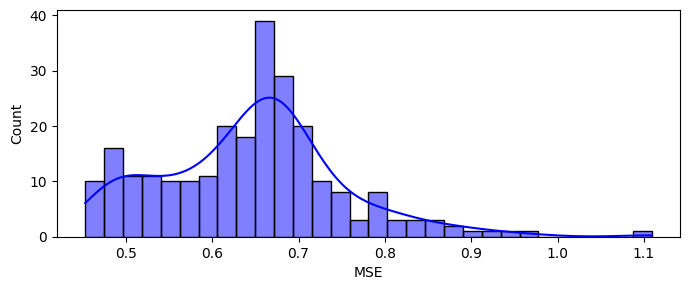

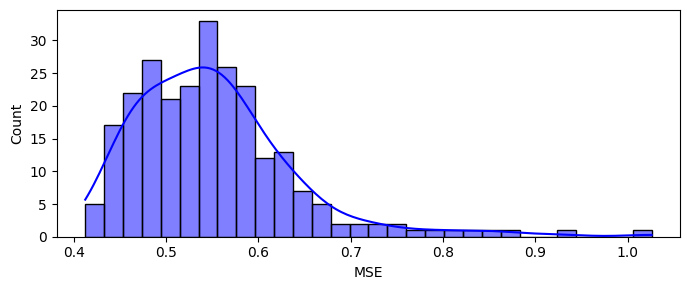

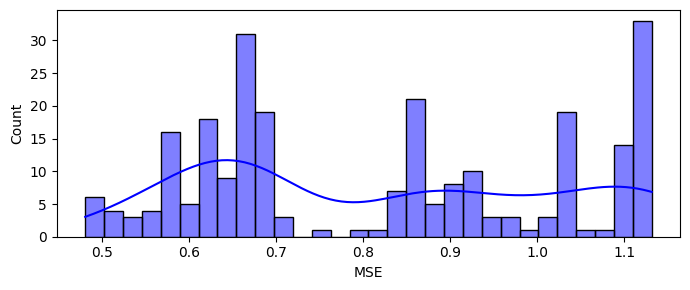

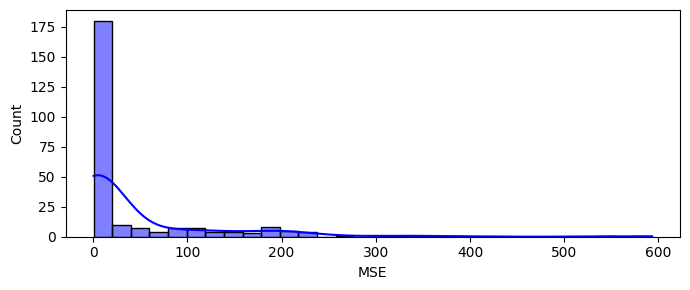

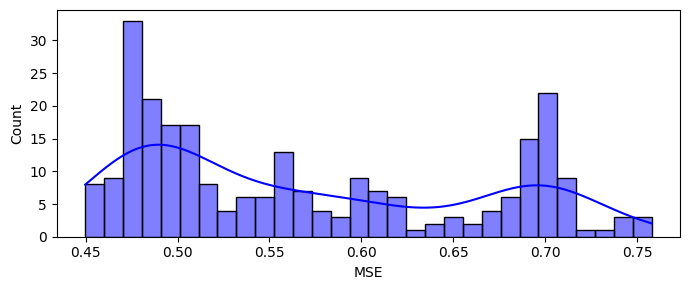

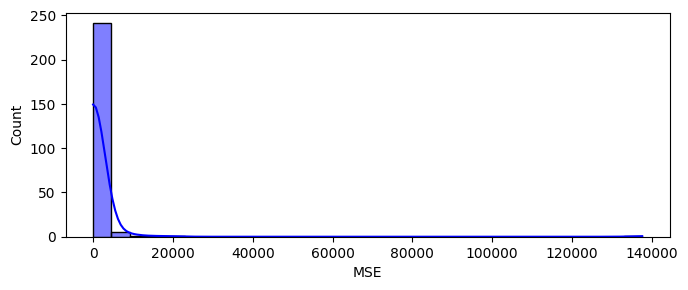

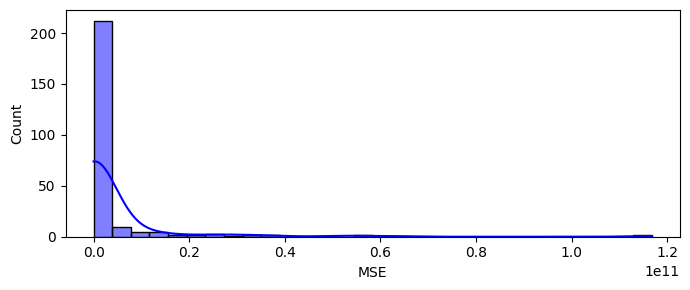

In [ ]:
grafico_distribucion(result_mlp["MSE"])
grafico_distribucion(result_cnn["MSE"])
grafico_distribucion(result_lstm["MSE"])
grafico_distribucion(result_transformer["MSE"])
grafico_distribucion(result_gru["MSE"])
grafico_distribucion(result_svr["MSE"])
grafico_distribucion(result_elm["MSE"])

## Test de Friedman


In [ ]:
# Convertir los datos en un array 2D
data = np.array([result_lstm["MSE"],result_elm["MSE"],result_svr["MSE"], result_cnn["MSE"],result_gru["MSE"],result_mlp["MSE"],result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = friedmanchisquare(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=877.437, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


In [ ]:
posthoc_df = sp.posthoc_mannwhitney([result_lstm["MSE"],result_svr["MSE"],result_elm["MSE"],result_cnn["MSE"],result_mlp["MSE"],result_gru["MSE"],result_transformer["MSE"]], p_adjust = 'bonferroni')
group_names= ["LSTM", "SRV","ELM","CNN","MLP","GRU","Transformer"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
LSTM,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SRV,0.000000,1.000000,0.000000,0.000302,0.000000,0.000000,0.000000
ELM,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
CNN,0.000000,0.000302,0.000000,1.000000,0.000000,1.000000,0.000000
MLP,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
GRU,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
Transformer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## post-hoc 1

In [ ]:
# Combinar los datos en un DataFrame
data_mse = pd.DataFrame({'LSTM':result_lstm["MSE"], "ELM":result_elm["MSE"], 'CNN':result_cnn["MSE"], 'MLP': result_mlp["MSE"],'GRU': result_gru["MSE"],'Transformer':result_transformer["MSE"]})
data_time = pd.DataFrame({'LSTM':result_lstm["time"], "ELM":result_elm["time"], 'CNN':result_cnn["time"], 'MLP': result_mlp["time"],'GRU': result_gru["time"],'Transformer':result_transformer["time"]})

In [ ]:
data_mse

,LSTM,ELM,CNN,MLP,GRU,Transformer
0,0.599751,2.104909e+10,0.633953,1.109069,0.513669,70.688065
1,1.106733,8.549546e+03,0.666285,0.757569,0.563734,5.583188
2,1.024648,3.567485e+02,0.569887,0.628941,0.457492,24.969719
3,1.130237,1.617334e+01,0.520860,0.664591,0.500903,6.666799
4,0.675125,4.123599e+00,0.452479,0.486619,0.477728,1.144906
...,...,...,...,...,...,...
245,0.976543,2.702939e+10,0.840163,0.607398,0.607227,163.659073
246,1.113315,9.465525e+07,0.633377,0.554062,0.684012,5.202038
247,0.627545,6.965839e+05,0.545615,0.511761,0.485851,0.458660
248,1.119192,3.882793e+07,0.448755,0.468057,0.536380,0.721593


In [ ]:
sp.posthoc_nemenyi_friedman(data_mse.T.T)

,LSTM,ELM,CNN,MLP,GRU,Transformer
LSTM,1.000000,0.001,0.00100,0.001,0.00100,0.337681
ELM,0.001000,1.000,0.00100,0.001,0.00100,0.001000
CNN,0.001000,0.001,1.00000,0.001,0.86007,0.001000
MLP,0.001000,0.001,0.00100,1.000,0.00100,0.001000
GRU,0.001000,0.001,0.86007,0.001,1.00000,0.001000
Transformer,0.337681,0.001,0.00100,0.001,0.00100,1.000000


In [ ]:
data_mse.describe()

,LSTM,ELM,CNN,MLP,GRU,Transformer
count,250.000000,2.500000e+02,250.000000,250.000000,250.000000,250.000000
mean,0.820291,3.897416e+09,0.550999,0.644976,0.568958,43.338793
std,0.204506,1.370432e+10,0.088587,0.105292,0.091301,86.885085
min,0.480841,6.992946e-01,0.412506,0.452941,0.449797,0.393783
25%,0.651699,5.980023e+02,0.486478,0.570777,0.485884,0.645620
50%,0.848814,1.814360e+05,0.543025,0.656205,0.545196,3.255078
75%,1.024145,9.359996e+07,0.587858,0.694951,0.672229,32.138686
max,1.131629,1.168018e+11,1.026004,1.109069,0.757962,593.368469


In [ ]:
data_time.describe()

,LSTM,ELM,CNN,MLP,GRU,Transformer
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,91.192572,0.081990,24.540454,17.677270,51.086390,153.110685
std,90.410629,0.065997,18.953588,29.404442,55.210434,167.307151
min,5.632627,0.001063,3.572325,2.259242,5.120343,3.509230
25%,18.721793,0.039085,13.441515,5.947151,17.198652,33.307327
50%,71.218880,0.065268,19.357874,9.774087,35.626766,97.811493
75%,120.794978,0.106334,29.242720,18.723681,66.590674,203.469211
max,572.667298,0.366349,170.328060,277.416047,587.858754,701.878154
